In [ ]:
import os 
if os.path.basename(os.getcwd()) == "notebooks": os.chdir("..")
import datajoint as dj
from datetime import datetime
from pathlib import Path
import re
import numpy as np
import intanrhdreader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from workflow.pipeline import lineage, culture
from workflow.pipeline import probe, ephys, analysis
from workflow.utils import helpers
from workflow.utils.paths import (get_ephys_root_data_dir, get_raw_root_data_dir, get_repo_dir, get_organoid_directory)

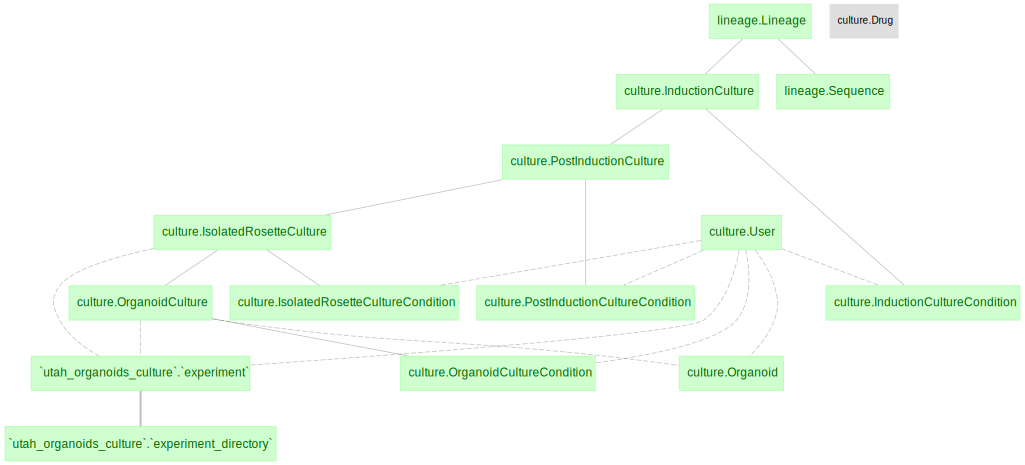

In [ ]:
dj.Diagram(lineage) + dj.Diagram(culture)

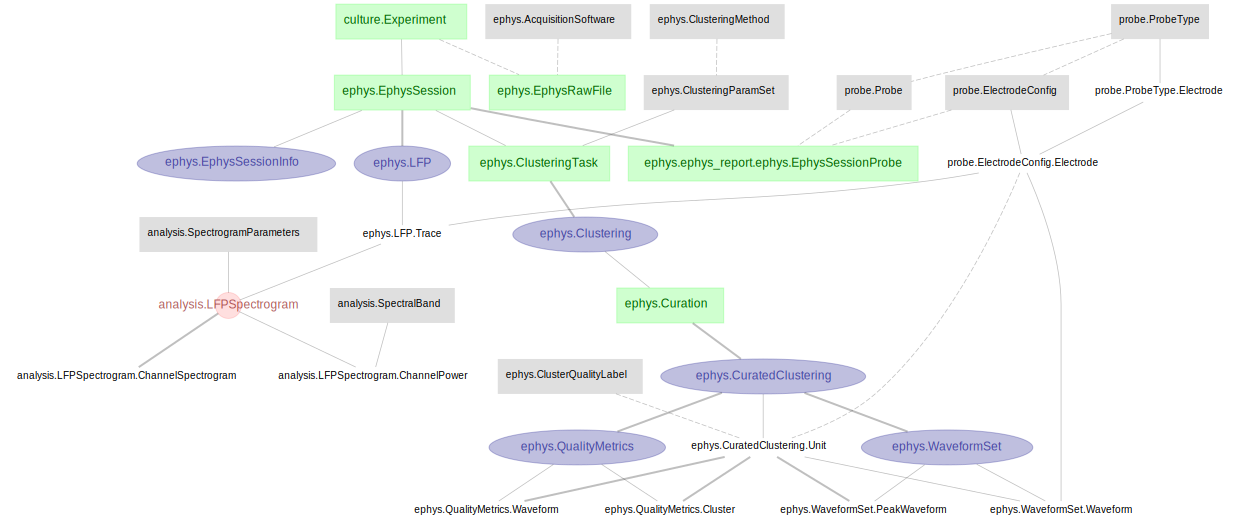

In [ ]:
dj.Diagram(culture.Organoid) + dj.Diagram(probe) + dj.Diagram(ephys) + dj.Diagram(analysis)

### Insert into `culture.Experiment` upstream from the ephys schema.

In [ ]:
culture.Experiment()

organoid_id e.g. O17,experiment_datetime Experiment start date and time,user,lineage_id de-identified code (e.g. hmau001),induction_culture_date,induction_culture_plate,post_induction_culture_date,post_induction_culture_plate,isolated_rosette_culture_date Date for isolating the rosette,isolated_rosette_culture_plate,organoid_culture_date,organoid_culture_plate,"experiment_plan e.g. mrna lysate, oct, protein lysate, or matrigel embedding, ephys, tracing",experiment_directory Path to the subject data directory
O09,2023-05-18 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O09-12_raw
O10,2023-05-18 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O09-12_raw
O11,2023-05-18 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O09-12_raw
O12,2023-05-18 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O09-12_raw
O13,2023-06-08 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O13-16_raw
O14,2023-06-08 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O13-16_raw
O15,2023-06-08 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O13-16_raw
O16,2023-06-08 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O13-16_raw
O17,2023-07-12 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O17-20_raw
O18,2023-07-12 00:00:00,None,None,None,None,None,None,None,None,None,None,ephys,O17-20_raw


### Insert into `probe.ProbeType`, `probe.Probe`, and `probe.ElectrodeConfig`

In [ ]:
helpers.ingest_probe()
display(probe.ProbeType())
display(probe.ProbeType.Electrode())
display(probe.ElectrodeConfig())
display(probe.ElectrodeConfig.Electrode())
display(probe.Probe())

probe_type e.g. neuropixels_1.0,"probe_full_name full, non-abbreviated name of the probe"
A1x32-5mm-25-177,None


probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","shank shank index, starts at 0, advance left to right","shank_col column index, starts at 0, advance left to right","shank_row row index, starts at 0.",x_coord (um) x coordinate of the electrode within the probe.,y_coord (um) y coordinate of the electrode within the probe.
A1x32-5mm-25-177,0,0,0,0,0.0,0.0
A1x32-5mm-25-177,1,0,0,1,0.0,25.0
A1x32-5mm-25-177,2,0,0,2,0.0,50.0
A1x32-5mm-25-177,3,0,0,3,0.0,75.0
A1x32-5mm-25-177,4,0,0,4,0.0,100.0
A1x32-5mm-25-177,5,0,0,5,0.0,125.0
A1x32-5mm-25-177,6,0,0,6,0.0,150.0
A1x32-5mm-25-177,7,0,0,7,0.0,175.0
A1x32-5mm-25-177,8,0,0,8,0.0,200.0
A1x32-5mm-25-177,9,0,0,9,0.0,225.0


electrode_config_hash,probe_type e.g. neuropixels_1.0,electrode_config_name user friendly name
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,0-31


electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","channel channel name fetched from raw data (e.g., A-001)"
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,0,19
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,1,4
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,2,18
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,3,5
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,4,17
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,5,6
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,6,31
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,7,8
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,8,30
e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,9,9


probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. neuropixels_1.0,probe_comment
12D4D,A1x32-5mm-25-177,
12D51,A1x32-5mm-25-177,
12D76,A1x32-5mm-25-177,
12D77,A1x32-5mm-25-177,
Q983,A1x32-5mm-25-177,
T590,A1x32-5mm-25-177,
T591,A1x32-5mm-25-177,
T593,A1x32-5mm-25-177,
T595,A1x32-5mm-25-177,


### Insert into `ephys.EphysRawFile`

Sample dataset directory structure including multiple subjects, a continuous recording session, and a single probe for each subject

In [ ]:
helpers.ingest_ephys_files()
ephys.EphysRawFile()

file_path path to the file on the external store relative to the root directory,organoid_id e.g. O17,experiment_datetime Experiment start date and time,acq_software,file_time date and time of the file acquisition,parent_folder parent folder containing the file,"filename_prefix filename prefix, if any, excluding the datetime information",file
O17-20_raw/O17-20_230630_024921.rhd,O17,None,Intan,2023-06-30 02:49:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025021.rhd,O17,None,Intan,2023-06-30 02:50:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025121.rhd,O17,None,Intan,2023-06-30 02:51:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230630_025221.rhd,O17,None,Intan,2023-06-30 02:52:21,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183014.rhd,O17,None,Intan,2023-07-13 18:30:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183114.rhd,O17,None,Intan,2023-07-13 18:31:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183214.rhd,O17,None,Intan,2023-07-13 18:32:14,O17-20_raw,O17-20,=BLOB=
O17-20_raw/O17-20_230713_183314.rhd,O17,None,Intan,2023-07-13 18:33:14,O17-20_raw,O17-20,=BLOB=


### Insert into `ephys.EphysSession`

In [ ]:
helpers.ingest_ephys_session()
display(ephys.EphysSession())
display(ephys.EphysSessionProbe())

[2023-10-25 11:26:32,401][WARNING]: MySQL server has gone away. Reconnecting to the server.


organoid_id e.g. O17,experiment_datetime Experiment start date and time,insertion_number,start_time,end_time,session_type analysis method,drug_name,drug_concentration concentration in uM
O09,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,lfp,4-AP,100.0
O09,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,lfp,4-AP,100.0
O09,2023-05-18 00:00:00,0,2023-05-19 09:30:00,2023-05-19 15:35:00,lfp,4-AP,100.0
O09,2023-05-18 00:00:00,0,2023-05-19 15:45:00,2023-05-20 15:40:00,lfp,4-AP,100.0
O10,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,lfp,No Drug,nan
O10,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,lfp,No Drug,nan
O10,2023-05-18 00:00:00,0,2023-05-19 09:30:00,2023-05-19 15:35:00,lfp,No Drug,nan
O10,2023-05-18 00:00:00,0,2023-05-19 15:45:00,2023-05-20 15:40:00,lfp,No Drug,nan
O11,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,lfp,Bicuculline,50.0
O11,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,lfp,Bicuculline,50.0


organoid_id e.g. O17,experiment_datetime Experiment start date and time,insertion_number,start_time,end_time,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)"
O09,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,Q983,A,=BLOB=
O09,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,Q983,A,=BLOB=
O09,2023-05-18 00:00:00,0,2023-05-19 09:30:00,2023-05-19 15:35:00,Q983,A,=BLOB=
O09,2023-05-18 00:00:00,0,2023-05-19 15:45:00,2023-05-20 15:40:00,Q983,A,=BLOB=
O10,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,T590,B,=BLOB=
O10,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,T590,B,=BLOB=
O10,2023-05-18 00:00:00,0,2023-05-19 09:30:00,2023-05-19 15:35:00,T590,B,=BLOB=
O10,2023-05-18 00:00:00,0,2023-05-19 15:45:00,2023-05-20 15:40:00,T590,B,=BLOB=
O11,2023-05-18 00:00:00,0,2023-05-18 12:25:00,2023-05-18 18:15:00,T591,C,=BLOB=
O11,2023-05-18 00:00:00,0,2023-05-18 18:15:00,2023-05-19 09:30:00,T591,C,=BLOB=


### Insert into `ephys.EphysSessionInfo`

In [ ]:
# ephys.EphysSessionInfo.populate()
ephys.EphysSessionInfo()

organoid_id e.g. O17,experiment_datetime Experiment start date and time,insertion_number,start_time,end_time,session_info Session header info from intan .rhd file. Get this from the first session file.
O17,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O18,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O19,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=


In [ ]:
key = {'organoid_id': 'O20',
 'experiment_datetime': datetime(2023, 7, 12, 0, 0),
 'insertion_number': 0,
 'start_time': datetime(2023, 7, 13, 18, 15),
 'end_time': datetime(2023, 7, 14, 15, 45)}

In [ ]:
from pprint import pprint

display(ephys.EphysSessionInfo())

session_info = (ephys.EphysSessionInfo & key).fetch1("session_info")
pprint(session_info) # session header extracted from the first file in a session

organoid_id e.g. O17,experiment_datetime Experiment start date and time,insertion_number,start_time,end_time,session_info Session header info from intan .rhd file. Get this from the first session file.
O17,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O18,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O19,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,=BLOB=


{'amplifier_channels': [{'board_stream': 0,
                         'chip_channel': 0,
                         'custom_channel_name': 'A-000',
                         'custom_order': 0,
                         'electrode_impedance_magnitude': 41204.3515625,
                         'electrode_impedance_phase': -20.303863525390625,
                         'native_channel_name': 'A-000',
                         'native_order': 0,
                         'port_name': 'Port A',
                         'port_number': 1,
                         'port_prefix': 'A'},
                        {'board_stream': 0,
                         'chip_channel': 1,
                         'custom_channel_name': 'A-001',
                         'custom_order': 1,
                         'electrode_impedance_magnitude': 40965.7578125,
                         'electrode_impedance_phase': -20.08125114440918,
                         'native_channel_name': 'A-001',
                         'native

### Plot data


In [ ]:
query = (ephys.LFP & key) * ephys.EphysSessionProbe * ephys.LFP.Trace * probe.ElectrodeConfig.Electrode  

query

organoid_id e.g. O17,experiment_datetime Experiment start date and time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",lfp_sampling_rate Down-sampled sampling rate (Hz).,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)",lfp,"channel channel name fetched from raw data (e.g., A-001)"
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,0,2500.0,T595,D,=BLOB=,=BLOB=,19
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,1,2500.0,T595,D,=BLOB=,=BLOB=,4
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,2,2500.0,T595,D,=BLOB=,=BLOB=,18
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,3,2500.0,T595,D,=BLOB=,=BLOB=,5
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,4,2500.0,T595,D,=BLOB=,=BLOB=,17
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,5,2500.0,T595,D,=BLOB=,=BLOB=,6
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,6,2500.0,T595,D,=BLOB=,=BLOB=,31
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,7,2500.0,T595,D,=BLOB=,=BLOB=,8
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,8,2500.0,T595,D,=BLOB=,=BLOB=,30
O20,2023-07-12 00:00:00,0,2023-07-13 18:15:00,2023-07-14 15:45:00,e972afbf-e332-3e42-0805-0ef25cb1e358,A1x32-5mm-25-177,9,2500.0,T595,D,=BLOB=,=BLOB=,9


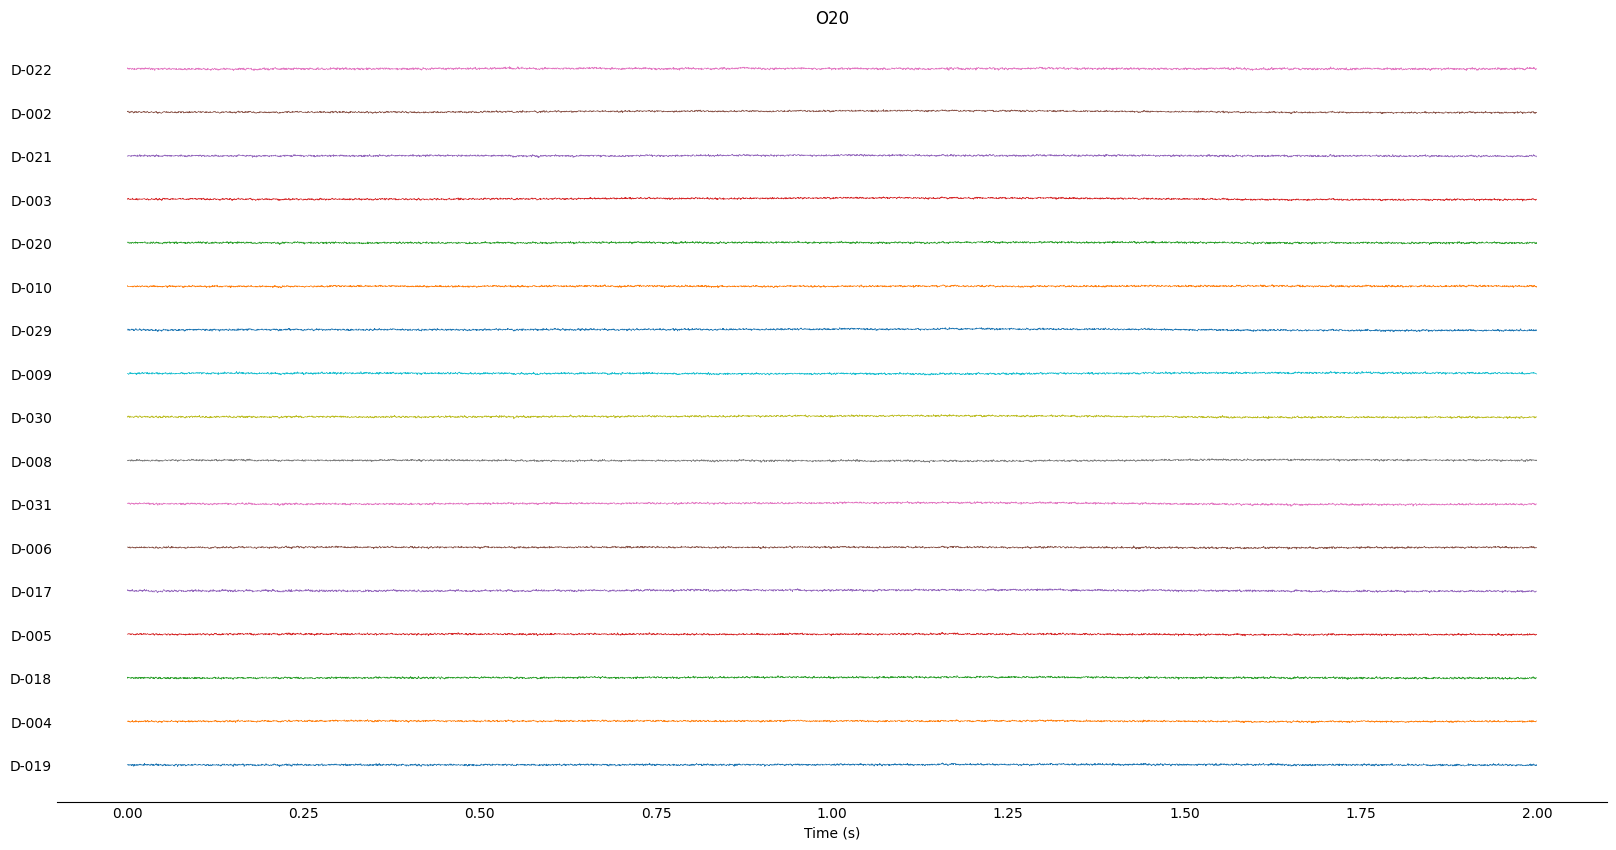

In [ ]:
plot_duration = 2  # seconds
length = int(lfp_info["lfp_sampling_rate"] * plot_duration)

fig, ax = plt.subplots(figsize=(20, 10))
ytick_loc = []
ytick_labels = []  # Create a list to store y-tick labels
for i, lfp_info in enumerate(query):
    if i == 0:
        time = np.arange(0, length) / lfp_info["lfp_sampling_rate"]
    
    ytick_loc.append(i * 500)
    
    ax.plot(time, lfp_info["lfp"][:length] + ytick_loc[-1], linewidth=0.5)
    
    # Create a label for the current channel
    channel_label = f'{lfp_info["port_id"]}-{lfp_info["channel"]:0>3}'
    ytick_labels.append(channel_label)  # Append the label to the list

ax.set(xlabel="Time (s)", title=key["organoid_id"])
ax.set_yticks(ytick_loc)
ax.set_yticklabels(ytick_labels)  # Set y-tick labels using the list
ax.tick_params(length=0)
sns.despine(right = True, left = True)

In [ ]:
# Plot raw vs. downsampled data
channel = "D-002"
nb_data_points = 20000   
fig, ax = plt.subplots(figsize=(20, 4))

timestamps, lfp = data["t"][:nb_data_points], lfp_data[channel][:nb_data_points]
timestamps_downsampled, lfp_downsampled = timestamps[::downsample_factor], lfp[::downsample_factor]

ax.plot(timestamps, lfp, 'k', linewidth=0.6, alpha=0.7, label="raw")
ax.plot(timestamps_downsampled, lfp_downsampled, 'm', linewidth=1, label="downsampled")
ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()

In [ ]:
# Raw data vs. denoised vs. lowpass-filtered
b_notch, a_notch = signal.iirnotch(
    w0=powerline_noise_freq, Q=30, fs=TARGET_SAMPLING_RATE
)
lfp_denoised = signal.filtfilt(b_notch, a_notch, lfp_downsampled)

# Lowpass filter
b_butter, a_butter = signal.butter(
    N=4, Wn=1000, btype="lowpass", fs=TARGET_SAMPLING_RATE
)
lfp_lowpass = signal.filtfilt(b_butter, a_butter, lfp_denoised)

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(timestamps_downsampled, lfp_downsampled, 'k', linewidth=1, alpha=0.7, label="downsampled")
ax.plot(timestamps_downsampled, lfp_denoised, 'g', linewidth=1, alpha=0.7, label="denoised")
ax.plot(timestamps_downsampled, lfp_lowpass, 'm', linewidth=1, alpha=0.7, label="lowpass")

ax.set(xlabel="Time (s)", ylabel="Amplitude (μV)", title=f"{Path(file).stem}.rhs - {channel}")
sns.despine()
plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5)) 
plt.show()